# Deep drawing 3D shape prediction

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import os
import sys
import json
sys.path.insert(0, "../../src")
from cut_predictor import ProjectionPredictor

## Load the pretrained network

In [9]:
reg = ProjectionPredictor()
reg.load_config('../../models/springback_uvmap_xyz.pkl')
reg.load_network('../../models/best_uv_xyz_model/')

A nicer visualization method with plotly, a faster one with matplotlib

In [10]:
reg.save_h5("../../models/springback_uvmap_xyz.h5")

In [11]:
reg3 = ProjectionPredictor.from_h5("../../models/springback_uvmap_xyz.h5")

In [12]:
reg2 = ProjectionPredictor()
reg2.load_h5("/tmp/model.h5")

In [13]:
param = {
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 110.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 238.22696,
        'Rp50': 449.528189,
    }

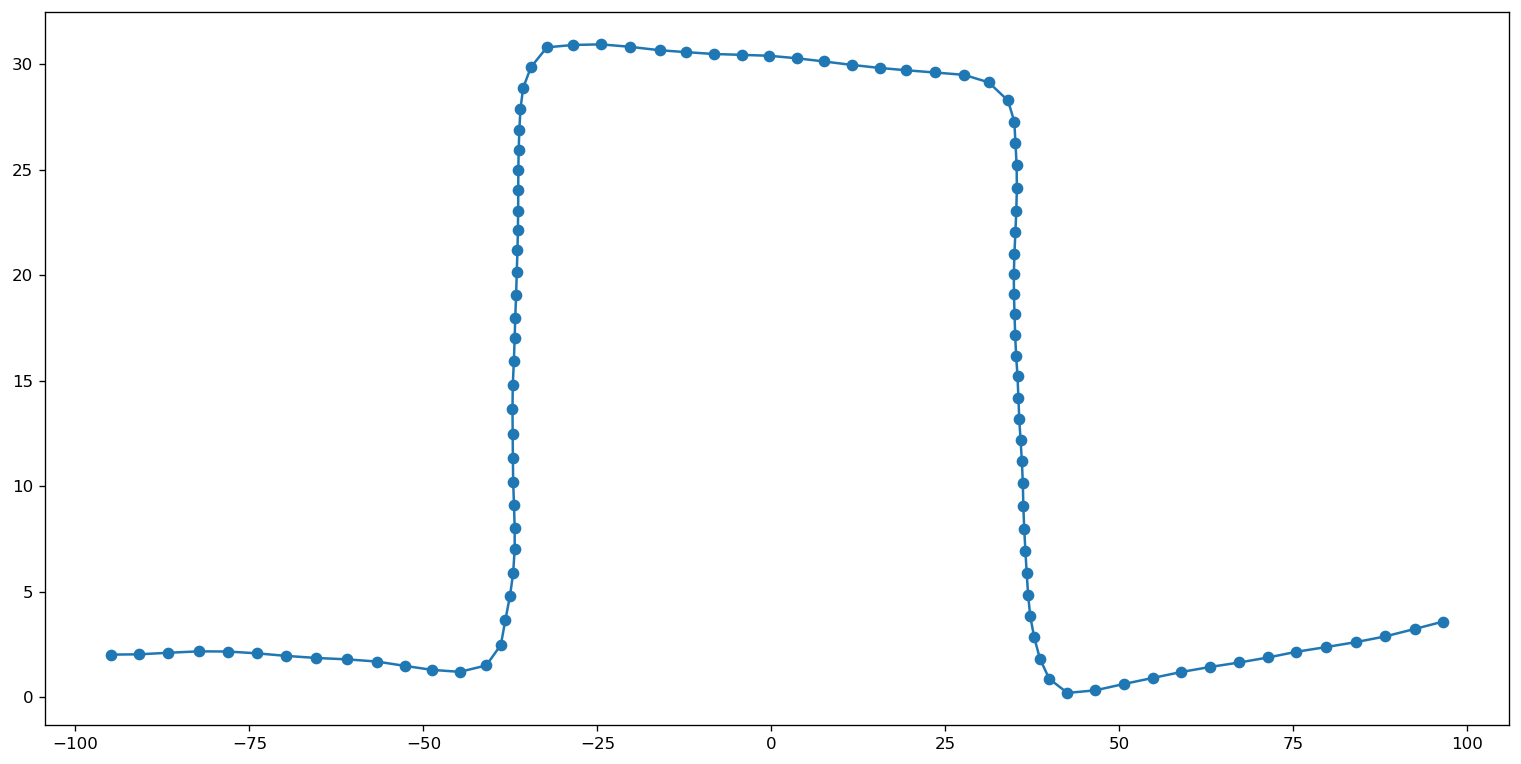

In [14]:
df = pd.DataFrame({"v": np.linspace(0.,1,100), "u": .5})
dfr = reg3.predict(param, df)
B = 400/25.4
H = 200/25.4
fig, ax = plt.subplots(1, figsize=(B, H))

ax.scatter(dfr.y, dfr.z)
ax.plot(dfr.y, dfr.z)
#dfr

In [16]:
dir(reg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compare',
 '_create_model',
 '_make_arrays',
 '_optimize',
 '_preprocess_parameters',
 '_preprocess_variables',
 '_rescale_output',
 '_visualize',
 'angle_input',
 'autotune',
 'batch_size',
 'categorical_attributes',
 'categorical_values',
 'compare',
 'compare_xyz',
 'custom_model',
 'data_loaded',
 'data_summary',
 'doe_id',
 'features',
 'from_h5',
 'has_config',
 'input_shape',
 'interactive',
 'load_config',
 'load_data',
 'load_h5',
 'load_network',
 'max_values',
 'mean_values',
 'min_values',
 'model',
 'number_samples',
 'optimize',
 'output_attributes',
 'position_attributes',
 'position_scaler',
 'predict',


In [18]:
reg.categorical_values


{'Ziehspalt': [1.6, 2.4], 'Ziehtiefe': [30, 50, 70]}

In [20]:
reg.process_parameters

['Blechdicke',
 'Niederhalterkraft',
 'Ziehspalt',
 'Einlegeposition',
 'Ziehtiefe',
 'Rp0']

In [22]:
reg.min_values

{'Blechdicke': 0.99,
 'Niederhalterkraft': 10,
 'Einlegeposition': -5,
 'Rp0': 133.18263199999998,
 'u': 0.0,
 'v': 0.0,
 'x': -202.42731,
 'y': -118.32256,
 'z': 0.0}

In [27]:
for prozess_parameter_name in reg.process_parameters:
    if prozess_parameter_name not in reg.categorical_attributes:
        print(prozess_parameter_name, reg.min_values.get(prozess_parameter_name), reg.max_values.get(prozess_parameter_name))

Blechdicke 0.99 1.48
Niederhalterkraft 10 500
Einlegeposition -5 5
Rp0 133.18263199999998 296.5565


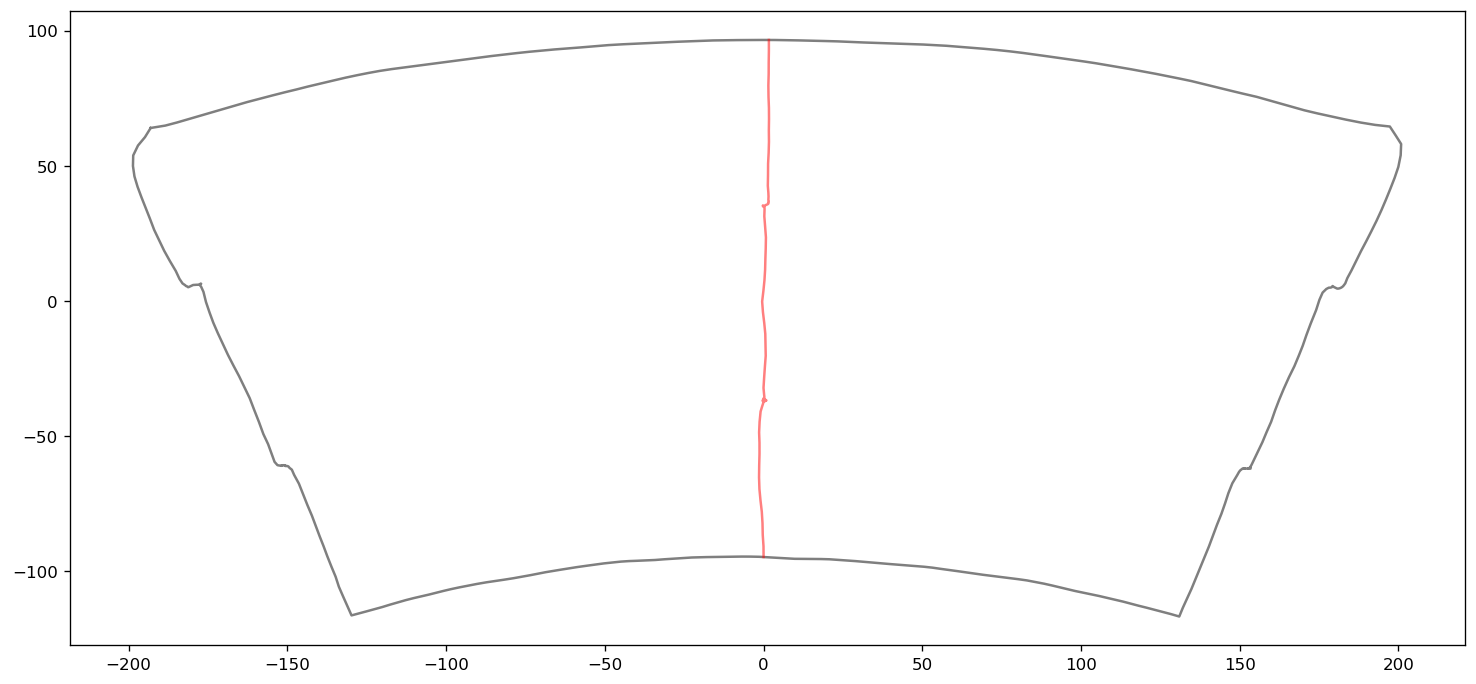

In [33]:
nn=100
df_top = pd.DataFrame({"u":np.linspace(0,1,nn), "v":1})
df_right = pd.DataFrame({"u":1., "v":np.linspace(1,0,nn)})
df_bot = pd.DataFrame({"u":np.linspace(1,0,nn), "v":0})
df_left = pd.DataFrame({"u":0., "v":np.linspace(0,1,nn)})
df_contour = pd.concat([df_top, df_right, df_bot, df_left], ignore_index=True)
df_contour = reg3.predict(param, df_contour)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(df_contour.x, df_contour.y, c="k", alpha=.5)
ax.plot(dfr.x, dfr.y, c="r", alpha=.5)

In [53]:
dfs = []
for u in np.linspace(0,1, 21):
    df = pd.DataFrame({"u":u, "v":np.linspace(0,1, 100)})
    dfs.append(df)
    dfs.append(pd.DataFrame({"u":[np.nan], "v":[np.nan]}))
for v in np.linspace(0,1, 41):
    df = pd.DataFrame({"v":v, "u":np.linspace(0,1, 100)})
    dfs.append(df)
    dfs.append(pd.DataFrame({"u":[np.nan], "v":[np.nan]}))
dfgrid = pd.concat(dfs, ignore_index=True)
dfgrid = reg3.predict(param, dfgrid)

Text(0.5, 0, 'z')

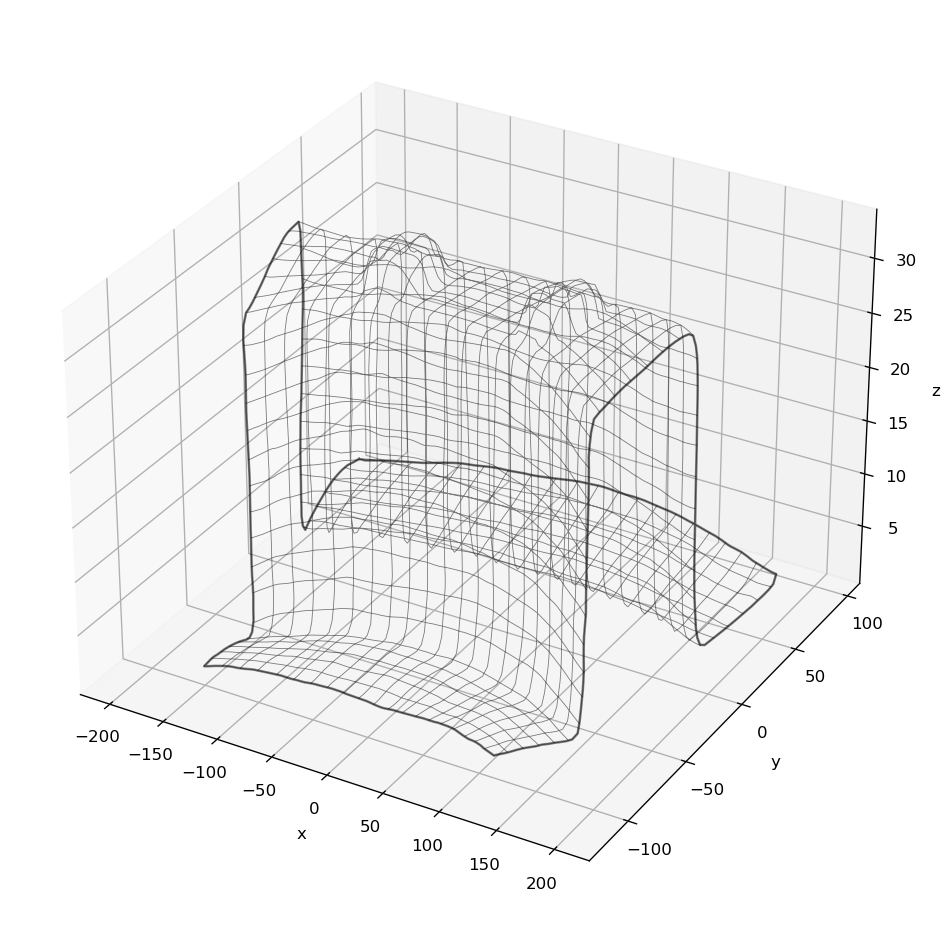

In [55]:
fig = plt.figure(1, figsize=(18, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(df_contour.x, df_contour.y, df_contour.z, c="k", alpha=.5)
ax.plot(dfgrid.x, dfgrid.y, dfgrid.z, c="k", alpha=.5, lw=.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [44]:
pd.DataFrame({"u":[np.nan], "v":[np.nan]})

,u,v
0,NaN,NaN
